Minimum value of the function is: 0.0026242437988566367
x1 = 2.998833198694448
x2 = 1.9883314563501933
Total iterations: 7


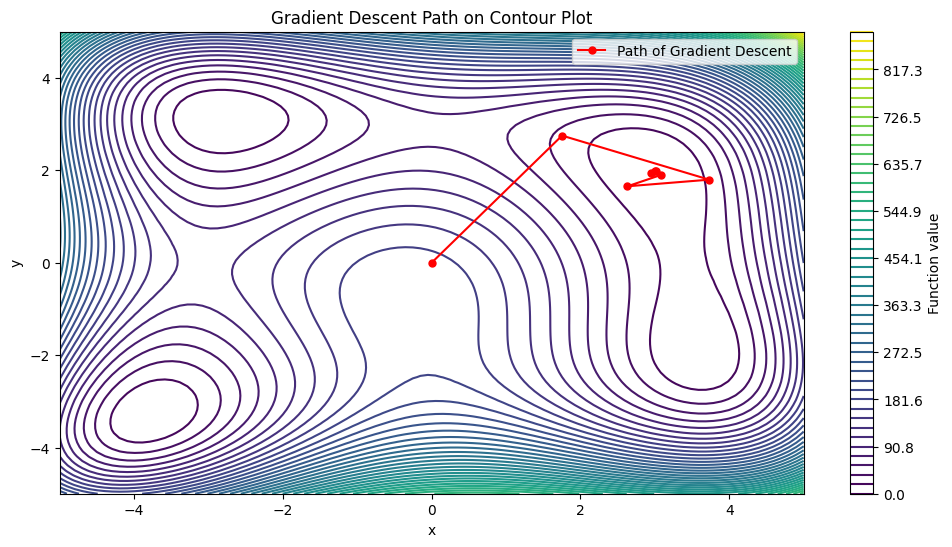

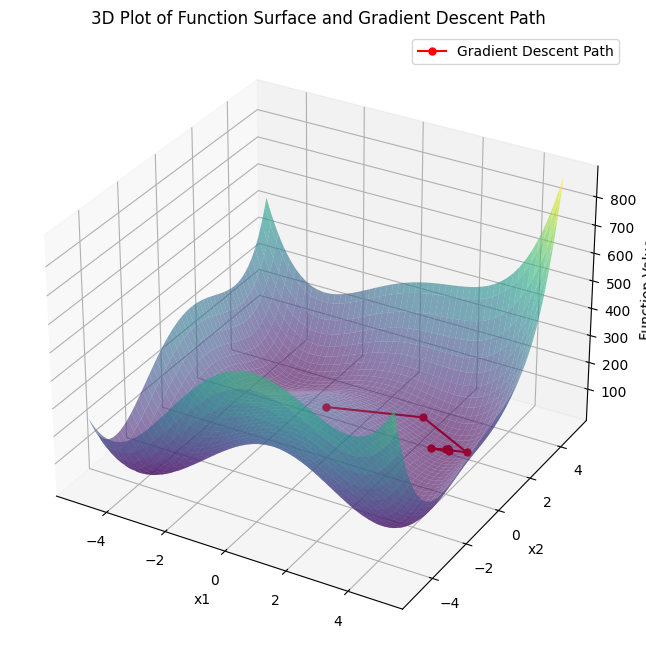

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function definition
func = lambda x, y: ((x)**2 + y - 11)**2 + ((y)**2 + x - 7)**2

# Gradient of the function
def grad(x1, x2):
    grad_x1 = -(func(x1 + 0.001, x2) - func(x1, x2)) / 0.001
    grad_x2 = -(func(x1, x2 + 0.001) - func(x1, x2)) / 0.001
    return np.array([grad_x1, grad_x2])

# Armijo condition parameters
alpha = 1.0      # Initial step size
beta = 0.4       # Step size reduction factor
sigma = 1e-4     # Armijo condition parameter

# Starting point
x1, x2 = 0, 0
x1_path, x2_path = [x1], [x2]
function_values = [func(x1, x2)]  # Track function values
tol = 0.001
iteration_count = 0  # Track number of iterations

# Gradient descent with Armijo line search
for i in range(10000):
    gradient = grad(x1, x2)

    # Line search to satisfy the Armijo condition
    t = alpha
    while func(x1 + t * gradient[0], x2 + t * gradient[1]) > func(x1, x2) + sigma * t * np.dot(gradient, gradient):
        t *= beta

    # Update points
    X1 = x1 + t * gradient[0]
    X2 = x2 + t * gradient[1]

    # Check for convergence
    if func(x1, x2) - func(X1, X2) < tol:
        break
    else:
        x1, x2 = X1, X2
        iteration_count += 1

    x1_path.append(x1)
    x2_path.append(x2)
    function_values.append(func(x1, x2))

print(f"Minimum value of the function is: {func(x1, x2)}")
print(f"x1 = {x1}")
print(f"x2 = {x2}")
print(f"Total iterations: {iteration_count}")

# Plotting
plt.style.use('default')
plt.figure(figsize=(12, 6))

# Function contour plot
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = func(X, Y)

# Increase contour density by adding more levels
contour_levels = np.linspace(Z.min(), Z.max(), 50)  # Increased from 10 to 50
plt.contour(X, Y, Z, levels=contour_levels, cmap='viridis')
plt.colorbar(label='Function value')

# Plot optimization path
plt.plot(x1_path, x2_path, 'r-o', markersize=5, label='Path of Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Path on Contour Plot')
plt.legend()
plt.show()

# 3D Plot of Function Values and Surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot the gradient descent path
ax.plot(x1_path, x2_path, function_values, 'r-o', markersize=5, label='Gradient Descent Path')

# Plot customization
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Function Value')
ax.set_title('3D Plot of Function Surface and Gradient Descent Path')
plt.legend()
plt.show()
